In [1]:
cd /home

/home


In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import os 


os.environ["CUDA_VISIBLE_DEVICES"] = "3"

In [30]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()

        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, tf.float32)

        self.warmup_steps = warmup_steps

    def __call__(self, step):
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps ** -1.5)
        
#         for a, b in zip(arg1, arg2):
#             print(a.numpy(), ' - ', b.numpy(), ' = ', (a<b).numpy())

        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)+.5e-3

Text(0, 0.5, 'Learning Rate')

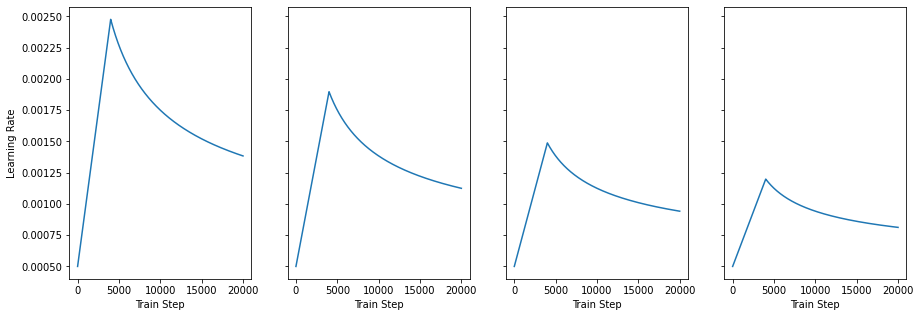

In [31]:
fig, axes = plt.subplots(1,4, figsize=(15,5), sharey=True)
for k, n_dim in enumerate([64, 128, 256, 512]):
    scheduler = CustomSchedule(n_dim)
    learning_rates = scheduler(tf.range(20000, dtype=tf.float32))
    axes[k].plot(learning_rates)
    axes[k].set_xlabel('Train Step')
axes[0].set_ylabel('Learning Rate')

Text(0, 0.5, 'Learning Rate')

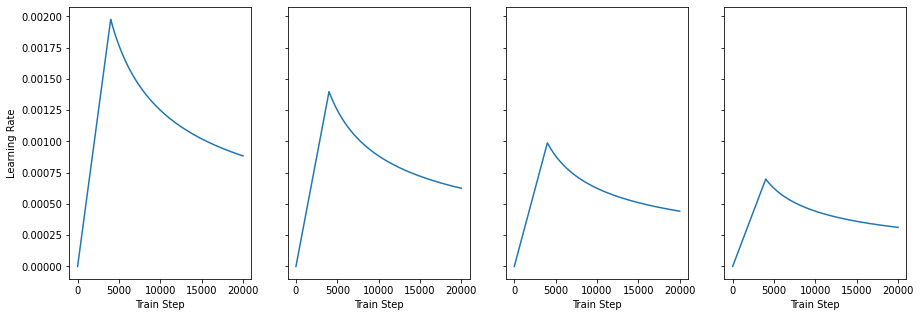

In [6]:
fig, axes = plt.subplots(1,4, figsize=(15,5), sharey=True)
for k, n_dim in enumerate([64, 128, 256, 512]):
    scheduler = CustomSchedule(n_dim)
    learning_rates = scheduler(tf.range(20000, dtype=tf.float32))
    axes[k].plot(learning_rates)
    axes[k].set_xlabel('Train Step')
    
axes[0].set_ylabel('Learning Rate')

Text(0, 0.5, 'Learning Rate')

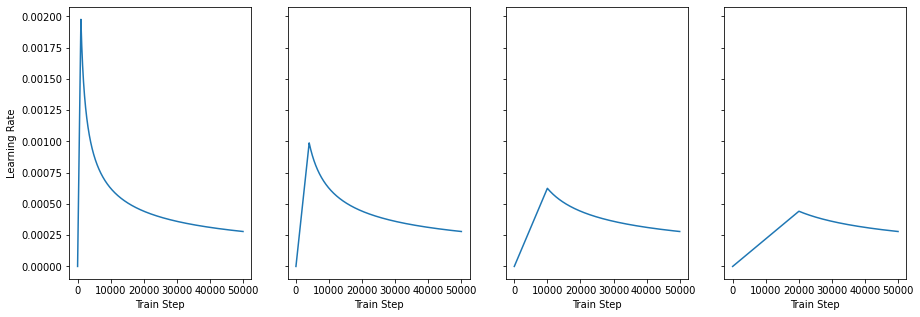

In [7]:
fig, axes = plt.subplots(1,4, figsize=(15,5), sharey=True)
for k, n_dim in enumerate([1000, 4000, 10000, 20000]):
    scheduler = CustomSchedule(256, warmup_steps=n_dim)
    learning_rates = scheduler(tf.range(50000, dtype=tf.float32))
    axes[k].plot(learning_rates)
    axes[k].set_xlabel('Train Step')
    
axes[0].set_ylabel('Learning Rate')